<a href="https://colab.research.google.com/github/tonyjung01/Machine-Learning/blob/main/7-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 모델 훈련

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 손실 곡선

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

if 구문을 제외하면 이전 절에서 만든 것과 동일함  
if 구문은 케라스 층을 추가하면 은니층 뒤에 또 하나의 층을 추가하는 역할을 함

입력층: 28×28 이미지 → 1D 벡터 변환 (Flatten)  
↓  
은닉층: Dense(100 뉴런, ReLU 활성화)  
↓  
(선택적으로 추가 레이어)  
↓  
출력층: Dense(10 뉴런, Softmax 활성화)

In [5]:
model = model_fn()

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

history 변수에 fit 메서드 결과 저장

In [7]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


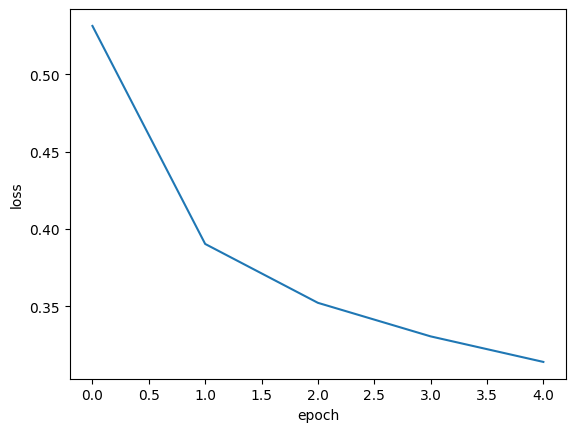

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

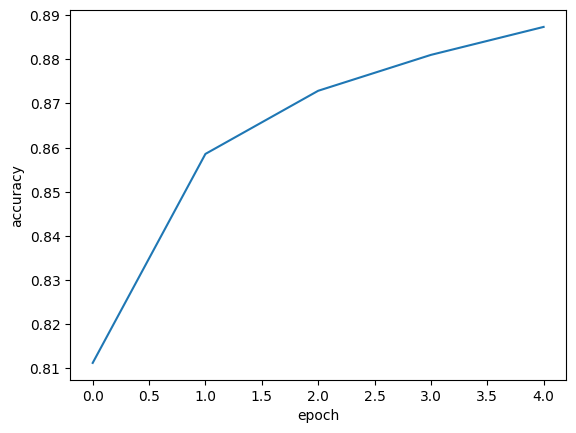

In [9]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

에포크마다 손실이 감소하고 정확도가 향상됨을 확인할 수 있음  
->에포크를 더 늘려보자!

In [10]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

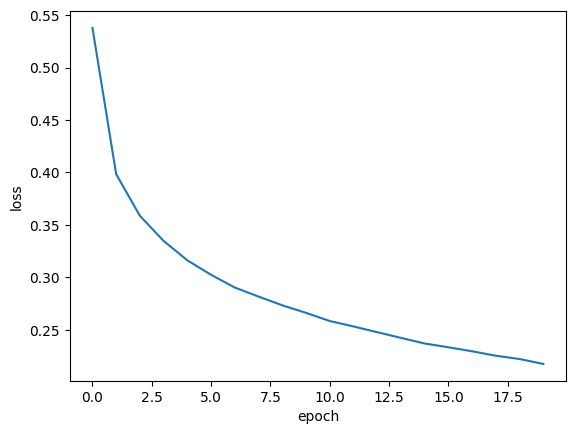

In [11]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

손실이 잘 감소함  
그런데 이거 더 나은 모델 맞나?

## 검증 손실

인공 신경망은모두 일종의 경사 하강법을 활용하므로 과대/과소적합 체크해야함 -> 검증 세트 점수도 확인해야함  
추가로 인공 신경망 모델은 정확도가 아니라 손실 함수를 최적화 하는데, 이따금 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있음

In [12]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [13]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


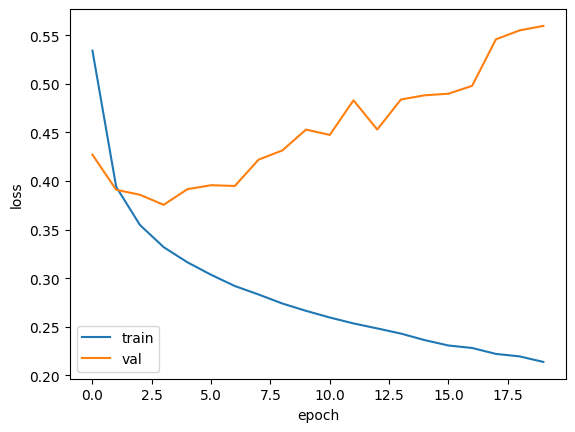

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

검증 세트에서 초기엔 검증 손실이 감소하다가 5번째 에포크부터 다시 상승  
이때 훈련 손실은 꾸준히 감소하므로 전형적인 과대적합

In [15]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

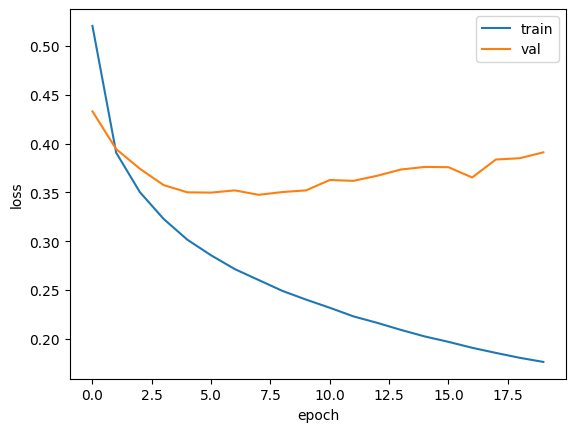

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

과대적합이 훨씬 줄었음

## 드롭아웃

드롭아웃은 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(출력 0) 과대적합 방지  
이를 통해 특정 뉴런에 과대하게 의존하는 것을 막음  
얼마나 많은 뉴런 드롭아웃할지는 하이퍼파라미터로 설정

In [18]:
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

드롭아웃 층은 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열 크기를 바꾸지는 않음

또한 텐서플로와 케라스는 모델 평가와 예측에는 자동으로 드롭아웃 적용하지 않음

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

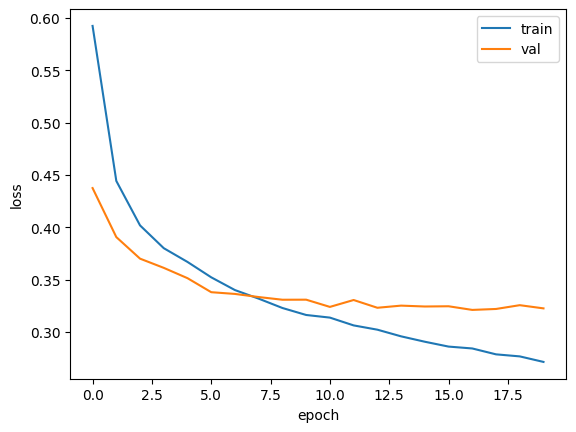

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

과대적합 확실히 줄었음  
20번해서 과대적합 되었으므로 10회로 다시

## 모델 저장과 복원

In [21]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [22]:
model.save('model-whole.keras')

In [23]:
model.save_weights('model.weights.h5')

In [24]:
!ls -al model*

-rw-r--r-- 1 root root 976600 Feb 10 09:51 model.weights.h5
-rw-r--r-- 1 root root 979391 Feb 10 09:51 model-whole.keras


In [25]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model.weights.h5')

훈련하지 않은 새로운 모델 만들고 이전에 저장한 모델 파라미터 적재

In [26]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.8819166666666667


10개의 확률 중에서 가장 큰 값의 인덱스를 골라 타깃 레이블과 비교하는 방식으로 예측 수행

In [27]:
model = keras.models.load_model('model-whole.keras')

model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8847 - loss: 0.3224


[0.3245339095592499, 0.8819166421890259]

## 콜백

콜백은 훈련 과정 중 어떤 작업을 수행할 수 있게 해주는 객체

In [28]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

ModelCheckpoint는 에포크마다 모델을 저장하고 save_best_only=True는 매개변수를 지정하여 가장 낮은 검증 손실 만드는 모델 저장

In [29]:
model = keras.models.load_model('best-model.keras')

model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8867 - loss: 0.3218


[0.31986963748931885, 0.8855833411216736]

In [30]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

과대적합 시작되기 전에 미리 훈련 중지하는 조기 종료  
patience=2이므로 2번 연속 검증 점수가 향상되지 않으면 훈련 중지  
restore_best_weights로 가장 낮은 검증 손실 낸 모델 파라미터로 되돌림

In [31]:
print(early_stopping_cb.stopped_epoch)

11


에포크 횟수가 0부터 시작하므로 12번쨰 에포크에서 훈련 정지  
patience=2이므로 최상의 모델은 10번째 에포크

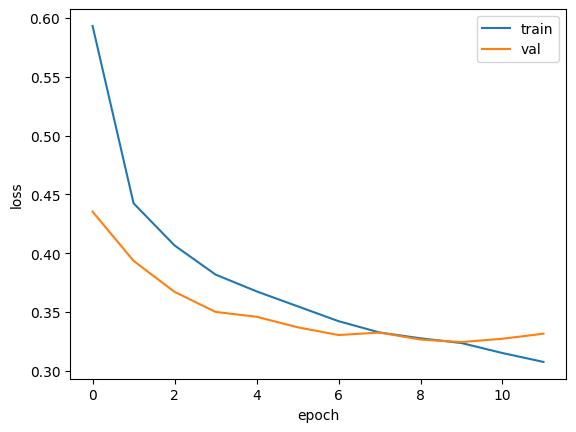

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [33]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8831 - loss: 0.3222


[0.3244042992591858, 0.8814166784286499]